In [1]:
import sys 
sys.version

'3.9.16 (main, Jan 11 2023, 16:16:36) [MSC v.1916 64 bit (AMD64)]'

In [3]:
import platform
platform.platform()

'Windows-10-10.0.19045-SP0'

In [4]:
import tensorflow as tf
print(tf.__version__)

2.9.0


In [2]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.config.set_visible_devices([], device_type='gpu')

### 신경망 리뷰

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
type(train_images)

numpy.ndarray

In [10]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

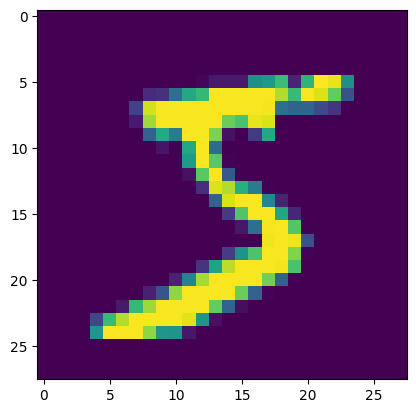

In [14]:
plt.imshow(train_images[0])

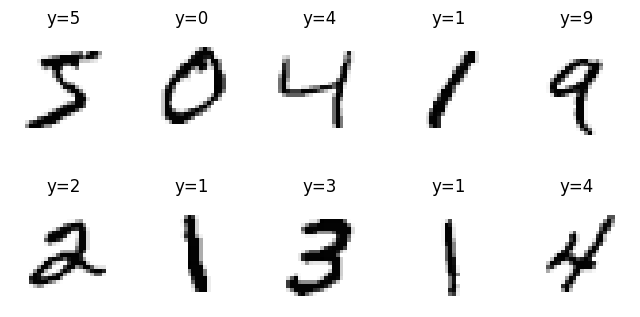

In [20]:
fig, subplots = plt.subplots(2, 5, figsize=(8, 4))
for 표본, 라벨, 그래프 in zip(train_images, train_labels, subplots.ravel()):
    그래프.imshow(표본, 'Greys')
    그래프.set_title(f'y={라벨}')
    그래프.axis('off')

### 손글씨 인식 모형

1. 기계학습
1. 신경망
    1. MLP
    1. ConvNet

In [23]:
train_images.shape

(60000, 28, 28)

In [24]:
def 전처리(x):
    x = x.astype('float32')
    x = x.reshape(-1, 28 * 28)
    x /= 255
    return x

In [27]:
x_train = 전처리(train_images)
print(f'{x_train.shape}, {x_train.min()} <= x <= {x_train.max()}')

(60000, 784), 0.0 <= x <= 1.0


In [28]:
x_test = 전처리(test_images)
print(f'{x_test.shape}, {x_test.min()} <= x <= {x_test.max()}')

(10000, 784), 0.0 <= x <= 1.0


In [33]:
from sklearn.linear_model import LogisticRegression

In [35]:
logreg = LogisticRegression(C=1.0).fit(x_train, train_labels)

C:\Users\PC\.conda\envs\pydeep\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
print(f'R2(최적화)={logreg.score(x_train, train_labels):.3f}, R2(일반화)={logreg.score(x_test, test_labels):.3f}')

R2(최적화)=0.935, R2(일반화)=0.926


In [44]:
from sklearn.ensemble import RandomForestClassifier
mnist_forest = RandomForestClassifier().fit(x_train, train_labels)

In [66]:
print(f'R2(최적화)={mnist_forest.score(x_train, train_labels):.3f}, R2(일반화)={mnist_forest.score(x_test, test_labels):.3f}')

R2(최적화)=1.000, R2(일반화)=0.970


In [68]:
from tensorflow import keras
from tensorflow.keras import Sequential, layers, losses, optimizers

mlp = keras.Sequential([
    layers.Dense(512, activation = 'relu'), 
    layers.Dense(10, activation = 'softmax')
])   

mlp.compile(loss = losses.sparse_categorical_crossentropy, optimizer=optimizers.RMSprop(), metrics=['accuracy'])
history = mlp.fit(x_train, train_labels, epochs=5, batch_size=100)

Epoch 1/5
600/600 [==============================] - 2s 4ms/step - loss: 0.2416 - accuracy: 0.9292
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0980 - accuracy: 0.9711
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0655 - accuracy: 0.9804
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0478 - accuracy: 0.9855
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0365 - accuracy: 0.9891


In [69]:
loss, acc = mlp.evaluate(x_test, test_labels)
print(f'정확도={acc:.2%}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0716 - accuracy: 0.9783
정확도=97.83%


### Tensorflow API

In [72]:
x = np.array(range(10))
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
x.shape

(10,)

In [75]:
x.ndim

1

In [76]:
x = tf.constant(range(10))
x

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [77]:
x.numpy()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [79]:
x2 = np.array([[0, 1, 2], [3, 4, 5]])
x2

array([[0, 1, 2],
       [3, 4, 5]])

In [80]:
tf.constant(x2)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5]])>

In [81]:
x2 - x2

array([[0, 0, 0],
       [0, 0, 0]])

In [82]:
tf.constant(x2) * 2

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 0,  2,  4],
       [ 6,  8, 10]])>

In [83]:
tf.constant(x2) - tf.constant(x2)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [0, 0, 0]])>

In [84]:
x1 = tf.constant([[1, 2], [3, 4]])
x2 = tf.constant([[-1, -1], [1, 1]])
tf.matmul(x1, x2)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1]])>

In [85]:
np.dot(x1.numpy(), x2.numpy())

array([[1, 1],
       [1, 1]])

### 경사 하강

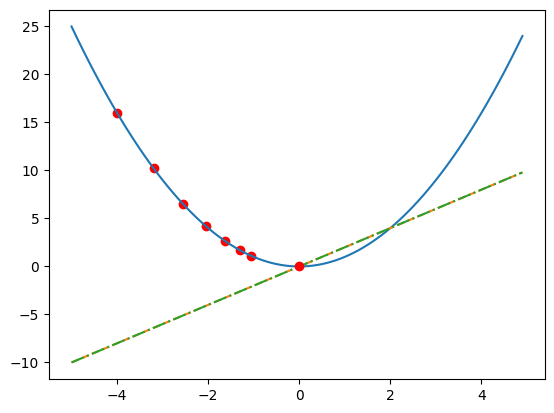

In [100]:
x = np.arange(-5, 5, 0.1)
f = lambda x: x**2

dfdx = lambda x: 2*x
def 수치미분(f, x):
    h = 1e-4
    return (f(x + h) - f(x)) / h

def 경사하강(f, 초기값, 학습횟수, 학습률):
    x = 초기값
    x_history = [x]
    for _ in range(학습횟수):
        # x = x - dfdx(x) * 학습률
        x = x - 수치미분(f, x) * 학습률
        x_history.append(x)
    return np.array(x_history)

x_history = 경사하강(f, 초기값 = -4, 학습횟수 = 6, 학습률 = 0.1)
plt.plot(x, f(x))
plt.plot(x, dfdx(x), '--')
plt.plot(x, 수치미분(f, x), '-.')

plt.scatter(x_history, f(x_history), c='r')
plt.plot(0, 0, 'ro')

# 6교시

In [180]:
x = tf.Variable(1.0)
with tf.GradientTape() as tape:
    y = x ** 2 

In [188]:
f = lambda x: x**2

def 경사하강(f, init_x, lr=0.01, step_num=100):
    x = tf.Variable(init_x)
    # x_history = [tf.constant(x)]
    x_history = [tf.constant(x)]
    for i in range(step_num):
        # x = x - dfdx(x) * 학습률
        with tf.GradientTape() as tape:
            y = f(x)
        grad = tape.gradient(y, x)    
        x.assign_sub(lr * grad)
        x_history.append(tf.constant(x))
    return tf.constant([xi.numpy() for xi in x_history])

x = tf.Variable(tf.range(-5, 5, 0.1))
print(x)
print(y)

<tf.Variable 'Variable:0' shape=(100,) dtype=float32, numpy=
array([-5.00000000e+00, -4.90000010e+00, -4.80000019e+00, -4.69999981e+00,
       -4.59999990e+00, -4.50000000e+00, -4.40000010e+00, -4.30000019e+00,
       -4.19999981e+00, -4.09999990e+00, -4.00000000e+00, -3.90000010e+00,
       -3.79999995e+00, -3.70000005e+00, -3.59999990e+00, -3.50000000e+00,
       -3.40000010e+00, -3.29999995e+00, -3.20000005e+00, -3.09999990e+00,
       -3.00000000e+00, -2.89999986e+00, -2.79999995e+00, -2.70000005e+00,
       -2.59999990e+00, -2.50000000e+00, -2.39999986e+00, -2.29999995e+00,
       -2.20000005e+00, -2.09999990e+00, -2.00000000e+00, -1.89999998e+00,
       -1.79999995e+00, -1.69999993e+00, -1.59999990e+00, -1.50000000e+00,
       -1.39999998e+00, -1.29999995e+00, -1.19999993e+00, -1.09999990e+00,
       -9.99999940e-01, -8.99999917e-01, -7.99999952e-01, -6.99999928e-01,
       -5.99999905e-01, -4.99999940e-01, -3.99999917e-01, -2.99999923e-01,
       -1.99999928e-01, -9.99999270e-02

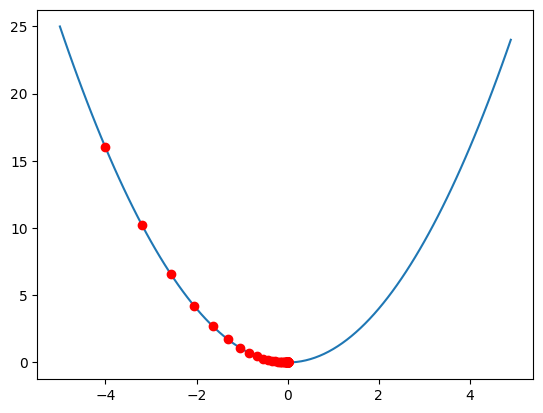

In [191]:
x = tf.Variable(tf.range(-5, 5, 0.1))
f = lambda x: x**2

def 경사하강(f, init_x, lr=0.01, step_num=100):
    x = tf.Variable(init_x)
    x_history = [tf.constant(x)]
    for i in range(step_num):
        # x = x - dfdx(x) * 학습률
        with tf.GradientTape() as tape:
            y = f(x)
        grad = tape.gradient(y, x)    
        x.assign_sub(lr * grad)
        x_history.append(tf.constant(x))
    return tf.constant([xi.numpy() for xi in x_history])

x_history = 경사하강(f, init_x=tf.constant(-4.0), lr=0.1, step_num=100)

plt.plot(x, f(x))
plt.plot(x_history.numpy(), f(x_history).numpy(), 'ro')
plt.plot(0, 0, 'ro')
plt.show()

[0.93471523] -0.20947310578088865


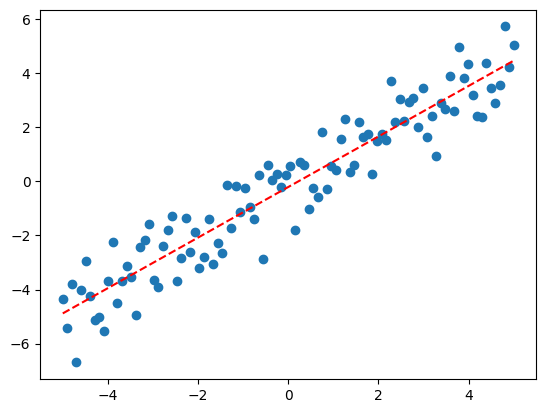

In [192]:
from sklearn.linear_model import LinearRegression

x = np.linspace(-5, 5, 100)
noise = np.random.randn(len(x))
y = x + noise

X = x.reshape(-1, 1)
linreg = LinearRegression().fit(X, y)
w = linreg.coef_
b = linreg.intercept_
print(w, b)

plt.scatter(x, y)
plt.plot(x, linreg.predict(X), 'r--')

In [120]:
class TFLinearRegression:
    def __int__(self):
        self.w = None
        self.b = None
        
    def predict(self, X):
        return tf.matmul(X, tf.expand_dims(self.w, axis=-1)) + self.b
    
    def fit(self, X, y):
        # todo
        raise NotImplementedError

In [134]:
tf_linreg = TFLinearRegression()
tf_linreg.w = w
tf_linreg.b = b
assert np.all(tf_linreg.predict(X).numpy().flatten() == linreg.predict(X))

In [176]:
x = tf.Variable(1.0)

with tf.GradientTape() as tape:
    y = x ** 2

In [177]:
dydx = tape.gradient(y, x)
dydx

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

# 7교시

In [227]:
class TFLinearRegression:
    def __int__(self):
        self.w = None
        self.b = None
        
    def predict(self, X):
        return tf.matmul(X, tf.expand_dims(self.w, axis=-1)) + self.b
    
    def 경사산출(self, X, y):
        with tf.GradientTape() as tape:
            Y_pred = self.predict(X)
            y_pred = tf.squeeze(Y_pred)
            # 손실 산출
            loss = tf.reduce_mean((y - y_pred) ** 2)
            
        dw, db = tape.gradient(loss, [self.w, self.b])
        return dw, db
    
    def fit(self, X, y, 학습횟수, 학습률):
        """ 학습 알고리즘 """
        # 1. 매개변수 초기화
        self.w = tf.Variable(np.zeros(X.shape[-1]), dtype=tf.float32)
        self.b = tf.Variable(0.0, dtype=tf.float32)     
        # 2. 최적화(손실 산출 및 경사 하강)
        for i in range(학습횟수):
            dw, db = self.경사산출(X, y)
            self.w.assign_sub(dw * 학습률)
            self.b.assign_sub(db * 학습률)

w=[0.9929], b=0.18813510239124298


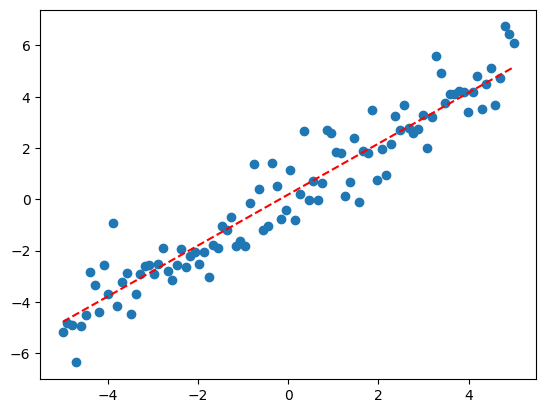

In [228]:
x = np.linspace(-5, 5, 100)
noise = np.random.randn(len(x))
y = x + noise

X = tf.constant(x.reshape(-1, 1), dtype=tf.float32)
                
linreg = TFLinearRegression()
linreg.fit(X, y, 학습횟수=10, 학습률=0.1)
print(f'w={linreg.w.numpy()}, b={linreg.b.numpy()}')

plt.scatter(x, y)
plt.plot(x, linreg.predict(X), 'r--')

### 케라스 구현

In [229]:
from tensorflow.keras import Sequential, layers

linreg = Sequential([layers.Dense(1)])
linreg.compile(loss='mse', optimizer=optimizers.SGD(learning_rate=0.1))
linreg.fit(X, y, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 0.9070
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 2.3332
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: 1.1847
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 1.1700
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 1.1697
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.9596
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 1.1646
Epoch 8/10
4/4 [==============================] - 0s 7ms/step - loss: 1.1602
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 0.8751
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.8237


4/4 [==============================] - 0s 3ms/step


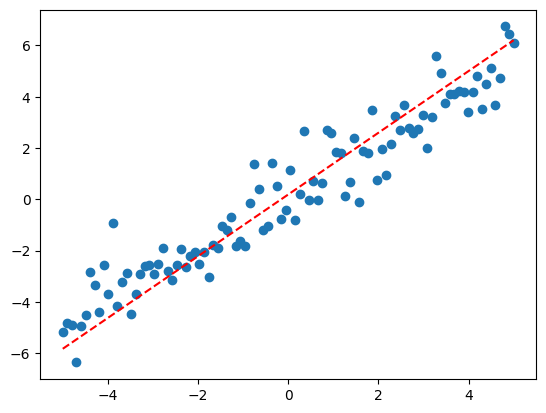

In [230]:
plt.scatter(x, y)
plt.plot(x, linreg.predict(X), 'r--')

### 신경망 간단한 모형 제시


In [154]:
from tensorflow.keras.datasets import fashion_mnist

In [167]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [168]:
train_images.shape

(60000, 28, 28)

In [169]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

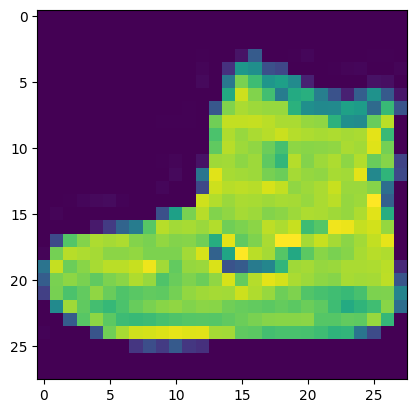

In [170]:
plt.imshow(train_images[0])

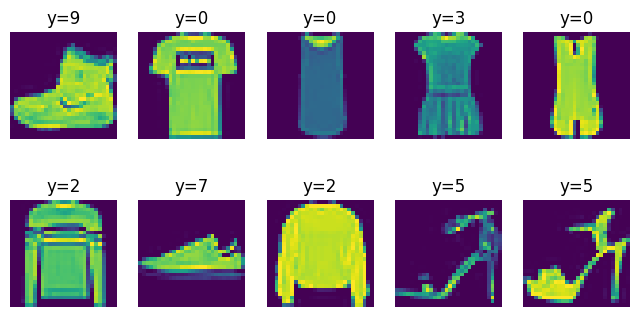

In [231]:
fig, subplots = plt.subplots(2, 5, figsize=(8, 4))
for 표본, 라벨, 그래프 in zip(train_images, train_labels, subplots.ravel()):
    그래프.imshow(표본)
    그래프.set_title(f'y={라벨}')
    그래프.axis('off')

In [232]:
from tensorflow.keras import Sequential, layers, losses, optimizers

의뷰분류기 = Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax', name='output')
])

의뷰분류기.compile(
    loss=losses.sparse_categorical_crossentropy,
    optimizer=optimizers.SGD(learning_rate=0.1), 
    metrics=['acc']
)

X_train = 전처리(train_images)
X_test = 전처리(test_images)

의뷰분류기.fit(X_train, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7245 - acc: 0.7461
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4914 - acc: 0.8259
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4453 - acc: 0.8429
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4196 - acc: 0.8498
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3970 - acc: 0.8575
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3869 - acc: 0.8622
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3731 - acc: 0.8668
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3629 - acc: 0.8701
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3562 - acc: 0.8725
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3484 - acc: 0.8748
